In [1]:
# Project By Varun Gehlot

'''
Objective:
- Use a deep convolutional neural network to perform facial recognition using Keras.
- Iterate the model until the accuracy is 90%

'''

'\nObjective:\n- Use a deep convolutional neural network to perform facial recognition using Keras.\n- Iterate the model until the accuracy is 90%\n\n'

In [2]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.layers

In [3]:
# Loading the .npz dataset that contains 400 images. There are 40 people and 10 images per person.

data = np.load('ORL_faces.npz')

In [4]:
# Just checking the file type.

type(data)

numpy.lib.npyio.NpzFile

In [5]:
# Printing the data that the files contain

print(data.files)

['testY', 'testX', 'trainX', 'trainY']


In [6]:
# loading the dataset and normalizing it

x_train = data['trainX']
x_train = np.array(x_train, dtype = 'float32')/255

x_test = data['testX']
x_test = np.array(x_test, dtype = 'float32')/255

y_train = data['trainY']
y_test = data['testY']

In [7]:
# Checking if nomalized

print(x_train)

[[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]


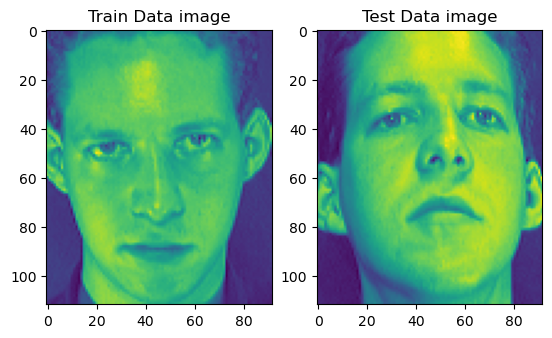

In [8]:
# Seeing the images from train and test data

a = x_train[2].reshape(112,92)
plt.subplot(1,2,1)
plt.imshow(a)
plt.title("Train Data image")

b = x_test[2].reshape(112,92)
plt.subplot(1,2,2)
plt.imshow(b)
plt.title("Test Data image")
plt.show()

In [9]:
# Splitting the dataset

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [10]:
# Transforming the images to equal sizes to feed in CNN

im_shape = (112, 92, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)

# Printing the shapes
print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape[0]))

x_train shape: 216
x_test shape: 160


In [11]:
# Building a CNN Model

cnn = tf.keras.models.Sequential()

In [12]:
# Input layer
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 7, activation= 'relu', input_shape = im_shape))

In [13]:
# Pooling Layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 5, activation= 'relu'))

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [16]:
# Flattening

cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units = 2024, activation= 'relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [19]:
cnn.add(tf.keras.layers.Dense(units = 1024, activation= 'relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [21]:
cnn.add(tf.keras.layers.Dense(units = 512, activation= 'relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [23]:
# 25 outputs
cnn.add(tf.keras.layers.Dense(25, activation= 'softmax'))

In [24]:
# Compiling

cnn.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Summarizing the Model

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 32)       1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29184)             0         
                                                                 
 dense (Dense)               (None, 2024)              5

In [26]:
# Training the Model

cnn.fit(x_train, y_train,validation_data= (np.array(x_valid),np.array(y_valid)) ,batch_size=512, epochs = 100)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 3.2165 - accuracy: 0.0417 - val_loss: 3.1836 - val_accuracy: 0.0417
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 3.3956 - accuracy: 0.0463 - val_loss: 3.1406 - val_accuracy: 0.0417
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 3.1844 - accuracy: 0.0556 - val_loss: 3.1587 - val_accuracy: 0.0417
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 3.1363 - accuracy: 0.0833 - val_loss: 3.1419 - val_accuracy: 0.0417
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 3.1245 - accuracy: 0.0741 - val_loss: 3.1076 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 3.0766 - accuracy: 0.0833 - val_loss: 3.0908 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 5s 5s/step - loss: 3.0619 - accuracy: 0.0602 - val_loss: 3.0500 - val_accuracy: 0.0417
Epoch 8/100
1/1 [=========

In [27]:
# Evaluation:

score = cnn.evaluate(x_test, y_test)
                     
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))

5/5 [==============================] - 2s 383ms/step - loss: 0.4874 - accuracy: 0.9250
Test Loss: 0.48744434118270874
Test Accuracy: 0.925000011920929
